In [3]:
import pandas as pd
import numpy as np

#csv불러오기(케글의 spam.csv가 cp1252로 인코딩 되어있음, 크롤링한 메일을 사용할땐 utf-8로 해야함)
textdf = pd.read_csv('crollingdata_copy.csv',encoding='utf-8')
#불필요한 columm제거

textdf['contents'][2]

"전체 멤버 메일\n쇼핑후기 분석, 지디디엔, 게스. 후아유, 크로스핏, 직구 등\n디매 쇼핑후기로 보는 23년 봄 트렌드\nhttps://bit.ly/3Uu8Hne\n\n환불과 실패 끝에 찾은 청바지, 지디디엔 리뷰\nhttps://bit.ly/3zGxD1f\n\n게스 23SS 송강 청바지 테스터 20인\nhttps://bit.ly/3KL7SCZ\n\n후아유 23SS 시그니처 엠블럼 카라티 스웨터 40인\nhttps://bit.ly/3KKy1St\n\n'이 운동' 하면 3개월 내로 인생 최대 피지컬 찍습니다\nhttps://bit.ly/3UqPT8q\n\n노숙자 아님, 키아누 리브스 사복 패션\nhttps://bit.ly/3ZVf57S\n\n스트릿 게시판 https://bit.ly/3JWiPjH\n\n\n언더아머 신세계 시흥 할인 https://bit.ly/3KktUvb\n롤렉스 신모델 공개 https://bit.ly/41brSUT\n틴더 월 $500 구독 https://bit.ly/3nVFZPQ\n\n\n24S -20%코드 SPRING20\nhttps://bit.ly/2ISdavQ\n\n매치스 -25% 25GIFTMF\nhttps://bit.ly/2JKhVuQ\n\nSSENSE -350불 무료배송\nhttps://bit.ly/3Ntdfpn\n\n마이테레사 -추가세일\nhttps://bit.ly/2Vx12GE\n\nLN-CC -세일-20% LN-EXTRA-SALE\nhttps://slooks.top/6opJ/65\n\n미스터포터 -10% MRP10THX\nhttps://bit.ly/3FZjOOK\n●디젤매니아● 대한민국 일등 패션 커뮤니티 디매인 DMAIN 드림\nhttps://cafe.naver.com/dieselmania\n본 메일은 발신전용 입니다. 네이버 서비스관련 궁금하신 사항은 네이버 고객센터에서 확인해주세요.\nCopyright ⓒ NAVER Corp. All Rights Reserved."

In [4]:
from konlpy.tag import Okt
import re

def remove_stopwords(text):

    # 형태소 분석기를 사용하여 형태소 단위로 분할
    okt = Okt()
    tokens = okt.morphs(text, stem=True)

    # 불용어 목록을 정의 (제거하고 싶은 단어들)
    stopwords = ['있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '아니', '없', '나', '같', '었', '였', '때문', '그렇', '위하', '때', '그러나', '더']

    # 불용어 제거
    tokens = [token for token in tokens if token not in stopwords]

    # 단어들을 공백으로 구분된 문자열로 변환
    filtered_text = ' '.join(tokens)

    return filtered_text

filtered_text =[]

# 불용어 제거
for text in textdf['contents'].tolist():
    filtered_text.append(remove_stopwords(text))
    


In [5]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#나이브 베이즈 모델에 넣기위해 텍스트를 벡터화해 수치정보로 나타내야함

# 단어 카운트 벡터화(리스트 형식만 가능)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(filtered_text)

# TF-IDF 변환
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)

# 벡터화된 텍스트 출력
print(X_tfidf.toarray())


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.07548415 0.         0.         ... 0.         0.         0.        ]]


In [6]:
#라벨링
from sklearn.preprocessing import LabelEncoder


features = ['ham', 'spam','ad']

encorder = LabelEncoder()
encorder.fit(features)
labels = encorder.transform(textdf['index'])
labels

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1,
       0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0,
       0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0,
       2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2,
       0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0,
       0, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 0, 2, 1, 1, 1,
       1, 1])

In [7]:
from sklearn.naive_bayes import MultinomialNB

# 다항식 나이브 베이즈 모델 생성
model = MultinomialNB()

# 학습 데이터와 라벨 준비
X = X_tfidf.toarray()  # 벡터화된 데이터
    # 분류 라벨
Y = labels

#테스트데이터와 트레이닝데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2)

# 모델 학습
model.fit(X_train, y_train)

MultinomialNB()

Accuracy: 0.9310
precision: 0.9368
Recall: 0.9310


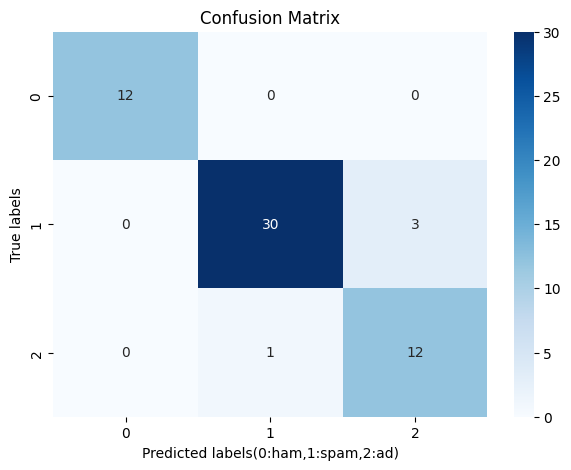

In [10]:
#혼동행렬과 정확도

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, recall_score, precision_score


# 모델 예측 함수
def predict(model, x):
    predictions = model.predict(x)
    return predictions

# ROC 커브 그리기
def plot_roc_curve(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


# 모델 검증 및 ROC 커브 그리기
def validate_model(model, x_val, y_val):
    # 모델 예측
    y_pred = predict(model, x_val)

    # 혼동 행렬 계산
    cm = confusion_matrix(y_val, y_pred)

    # 정확도 계산
    accuracy = accuracy_score(y_val, y_pred)

    # 정밀도 계산
    precision = precision_score(y_val, y_pred,  average='weighted')
    # 재현율 계산
    recall = recall_score(y_val, y_pred, average='weighted')

    # 정밀도와 정확도와 재현율 출력
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    
    # 혼동 행렬 시각화
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels(0:ham,1:spam,2:ad)')
    plt.ylabel('True labels')
    
    
    plt.title('Confusion Matrix')
    plt.show()

    
    # ROC 커브 그리기
    #plot_roc_curve(y_val, y_pred)

# 모델 검증 실행
validate_model(model, X_test, y_test)
